In [13]:
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

In [9]:
def jacobian_inv(x, y):
    cos_sq = np.cos(x - y) ** 2
    j = np.array([[2*y, -1/cos_sq - x], [-2*x, -1/cos_sq + y]])
    return  -2*(x + y)*(1/cos_sq + x - y) * j  

In [10]:
def f(x, y):
    return np.array([np.tan(y-x) + x*y -0.3, x**2 + y**2 - 1.5])

Вот область, где якобиан < 1:

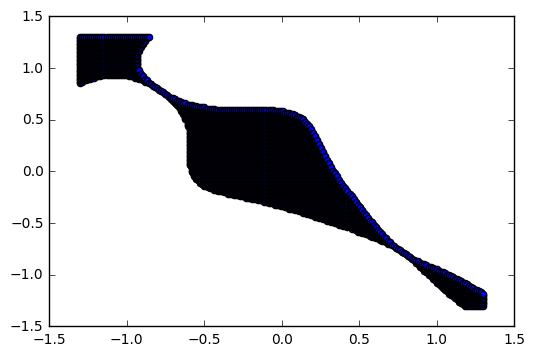

In [26]:
xs = []
ys = []
epsilon = 0.08
for x in np.linspace(-1.3, 1.3, 200):
    for y in np.linspace(-1.3, 1.3, 200):
        cos_sq = np.cos(x - y) ** 2
        if  np.fabs(-2*(x + y)*(1/cos_sq + x - y)) < 1:
            xs.append(x)
            ys.append(y)
plt.scatter(xs, ys)

А вот область, где лежит первый корень( второй лежит в такой же, симметрично относительно начала координат):

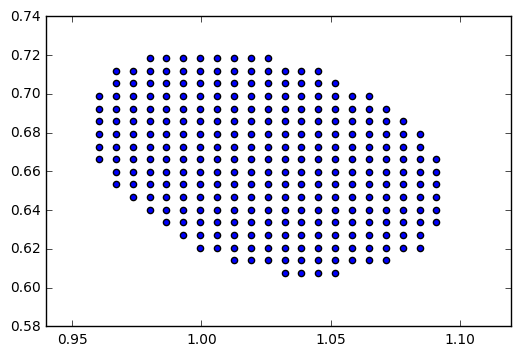

In [29]:
xs = []
ys = []
epsilon = 0.1
for x in np.linspace(0, 1.3, 200):
    for y in np.linspace(0, 1.3, 200):
        if  np.sum(f(x, y) ** 2) < 2 * epsilon ** 2:
            xs.append(x)
            ys.append(y)
plt.scatter(xs, ys)

И метод перестал работать:

In [31]:
u_0 = np.array([1.02, 0.67])
epsilon = 1e-6
u_prev = u_0
u_curr = u_prev + jacobian_inv(*u_prev).dot(f(*u_prev))
while np.sum((u_curr - u_prev) ** 2) > 2*epsilon**2:    
    u_prev = u_curr
    print(u_curr)
    u_curr = u_prev + jacobian_inv(*u_prev).dot(f(*u_prev))

[ 0.78107504  0.83304054]
[-2.35091532  2.66166661]
[ 608.69099185  575.6325658 ]
[  8.66708263e+13   8.59905406e+13]
[  2.39153121e+66   2.37275990e+66]
